## Quantum Computing and Quantum Machine Learning, Project 1

### Part a)

In [89]:
import numpy as np
import matplotlib.pyplot as plt

#Write a function which sets up a one-qubit basis
def one_qubit_basis():
    ket0 = np.array([1,0])
    ket1 = np.array([0,1])
    return ket0, ket1
#defining a function that returns the Bell states
def bell_state():
    ket0, ket1 = one_qubit_basis()
    s00 = np.kron(ket0,ket0)
    s01 = np.kron(ket0,ket1)
    s10 = np.kron(ket1,ket0)
    s11 = np.kron(ket1,ket1)

    ket00 = (s00 + s11)/np.sqrt(2)
    ket01 = (s01 + s10)/np.sqrt(2)
    ket10 = (s00 - s11)/np.sqrt(2)
    ket11 = (s01 - s10)/np.sqrt(2)

    return ket00, ket01, ket10, ket11



ket0, ket1 = one_qubit_basis()
print("|0⟩:",ket0)
print("|1⟩:",ket1)

#Pauli matrices
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])

# Applying Pauli matrices to the basis
ket0_sigma_x = sigma_x@ket0
ket1_sigma_x = sigma_x@ket1
print("\nσ_x|0⟩:",ket0_sigma_x)
print("σ_x|1⟩:",ket1_sigma_x)

ket0_sigma_y = sigma_y@ket0
ket1_sigma_y = sigma_y@ket1
print("σ_y|0⟩:",ket0_sigma_y)
print("σ_y|1⟩:",ket1_sigma_y)

ket0_sigma_z = sigma_z@ket0
ket1_sigma_z = sigma_z@ket1
print("σ_z|0⟩:",ket0_sigma_z)
print("σ_z|1⟩:",ket1_sigma_z)

# Create Hadamar and Phase gates
Hadamard = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])
Phase = np.array([[1,0],[0,1j]])   

#Apply Hadamard and Phase gates to the basis
ket0_Hadamard = Hadamard@ket0
ket1_Hadamard = Hadamard@ket1
print("\nH|0⟩:",ket0_Hadamard)
print("H|1⟩:",ket1_Hadamard)

ket0_Phase = Phase@ket0
ket1_Phase = Phase@ket1
print("\nP|0⟩:",ket0_Phase)
print("P|1⟩:",ket1_Phase)


#Define CNOT gate
CNOT = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])


#Create Bell state out of ket0 with Hadamard and CNOT
ket0_Hadamard = Hadamard@ket0
ket1_Hadamard = Hadamard@ket1
bell00 = CNOT@np.kron(ket0_Hadamard,ket0)
bell10 = CNOT@np.kron(ket1_Hadamard,ket0) 
bell01 = CNOT@np.kron(ket0_Hadamard,ket1)
bell11 = CNOT@np.kron(ket1_Hadamard,ket1)

bs00,bs01,bs10,bs11 = bell_state()  

print("\nBell states:") 
print("Bell state |00⟩:",bell00)
print("Bell state |01⟩:",bell01)
print("Bell state |10⟩:",bell10)
print("Bell state |11⟩:",bell11)
print("\nDouble check Bell states:")
print("Bell state |00⟩:",bs00)
print("Bell state |01⟩:",bs01)
print("Bell state |10⟩:",bs10)
print("Bell state |11⟩:",bs11)


|0⟩: [1 0]
|1⟩: [0 1]

σ_x|0⟩: [0 1]
σ_x|1⟩: [1 0]
σ_y|0⟩: [0.+0.j 0.+1.j]
σ_y|1⟩: [0.-1.j 0.+0.j]
σ_z|0⟩: [1 0]
σ_z|1⟩: [ 0 -1]

H|0⟩: [0.70710678 0.70710678]
H|1⟩: [ 0.70710678 -0.70710678]

P|0⟩: [1.+0.j 0.+0.j]
P|1⟩: [0.+0.j 0.+1.j]

Bell states:
Bell state |00⟩: [0.70710678 0.         0.         0.70710678]
Bell state |01⟩: [0.         0.70710678 0.70710678 0.        ]
Bell state |10⟩: [ 0.70710678  0.          0.         -0.70710678]
Bell state |11⟩: [ 0.          0.70710678 -0.70710678  0.        ]

Double check Bell states:
Bell state |00⟩: [0.70710678 0.         0.         0.70710678]
Bell state |01⟩: [0.         0.70710678 0.70710678 0.        ]
Bell state |10⟩: [ 0.70710678  0.          0.         -0.70710678]
Bell state |11⟩: [ 0.          0.70710678 -0.70710678  0.        ]


In [90]:
#Apply Hadamard, then CNOT to the Bell states
bell00_H = np.kron(Hadamard,np.eye(2))@bell00
bell01_H = np.kron(Hadamard,np.eye(2))@bell01
bell10_H = np.kron(Hadamard,np.eye(2))@bell10
bell11_H = np.kron(Hadamard,np.eye(2))@bell11

print("\nBell states after Hadamard gate:")
print("Bell state |00⟩:",bell00_H)
print("Bell state |01⟩:",bell01_H)
print("Bell state |10⟩:",bell10_H)
print("Bell state |11⟩:",bell11_H)

bell00_HCNOT = CNOT@bell00_H
bell01_HCNOT = CNOT@bell01_H
bell10_HCNOT = CNOT@bell10_H
bell11_HCNOT = CNOT@bell11_H

print("\nBell states after Hadamard and CNOT gates:")
print("Bell state |00⟩:",bell00_HCNOT)
print("Bell state |01⟩:",bell01_HCNOT)
print("Bell state |10⟩:",bell10_HCNOT)
print("Bell state |11⟩:",bell11_HCNOT)



Bell states after Hadamard gate:
Bell state |00⟩: [ 0.5  0.5  0.5 -0.5]
Bell state |01⟩: [ 0.5  0.5 -0.5  0.5]
Bell state |10⟩: [ 0.5 -0.5  0.5  0.5]
Bell state |11⟩: [-0.5  0.5  0.5  0.5]

Bell states after Hadamard and CNOT gates:
Bell state |00⟩: [ 0.5  0.5 -0.5  0.5]
Bell state |01⟩: [ 0.5  0.5  0.5 -0.5]
Bell state |10⟩: [ 0.5 -0.5  0.5  0.5]
Bell state |11⟩: [-0.5  0.5  0.5  0.5]


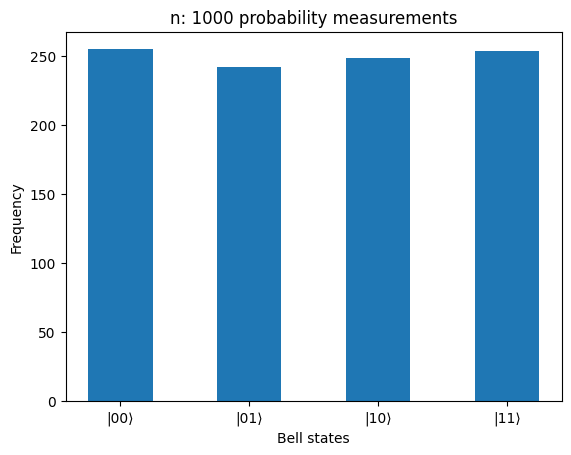

In [154]:
import random
#Make repeated measurements on the first qubit, then the second qubit

def bell_measurements(n, bell_state):
    """
    Measurements on Bell state " |00⟩:"
    |00⟩: idx0
    |01⟩: idx1
    |10⟩: idx2
    |11⟩: idx3
    """
    results = []
    prob = np.abs(bell_state)/np.sum(np.abs(bell_state))

    for i in range(n):
        idx = random.choices(range(len(bell_state)), weights=prob)
        results.append(idx[0])
    return results 


n = 1000
results = bell_measurements(n, bell00_HCNOT)

plt.hist(results,bins = np.arange(5)-0.5,rwidth=0.5)
plt.xticks(range(4), ["|00⟩", "|01⟩", "|10⟩", "|11⟩"])
plt.title(f"n: {n} probability measurements")
plt.ylabel("Frequency")
plt.xlabel("Bell states")
plt.show()
